### Multiple Layer Perceptron Hands-on using `IRIS` dataset

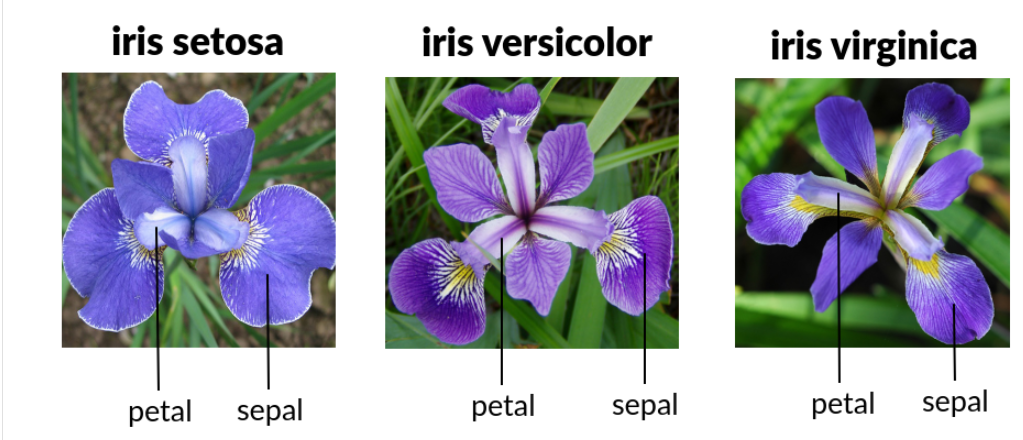

### `About IRIS data`

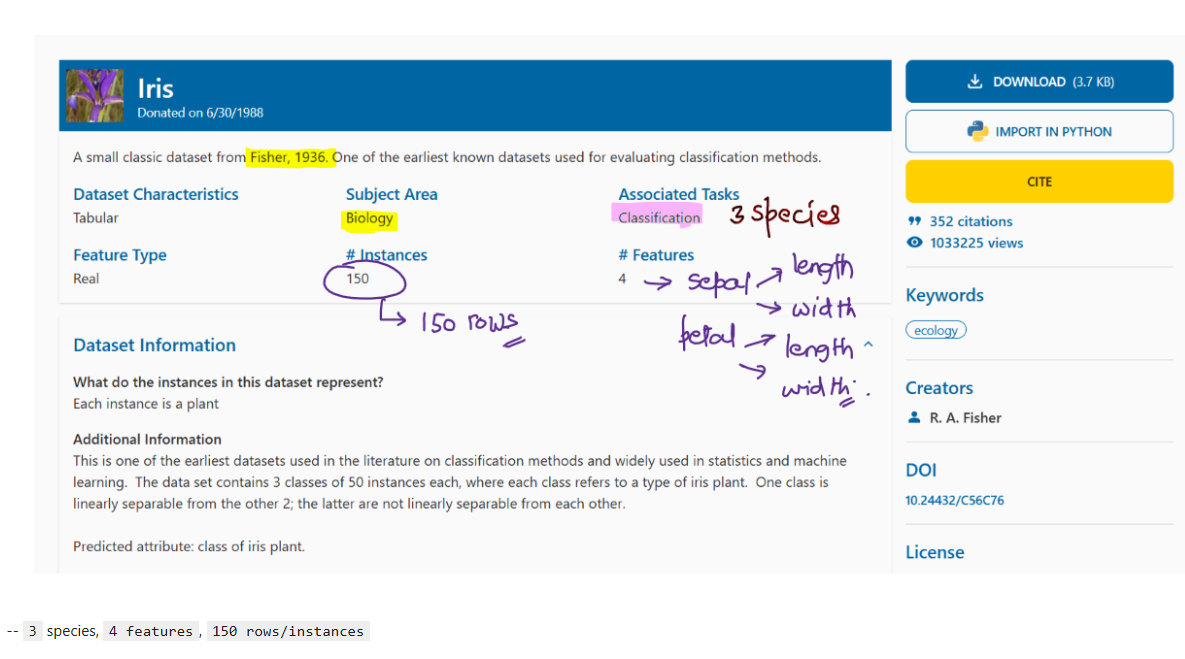

### `IRIS Data` Benchmarks

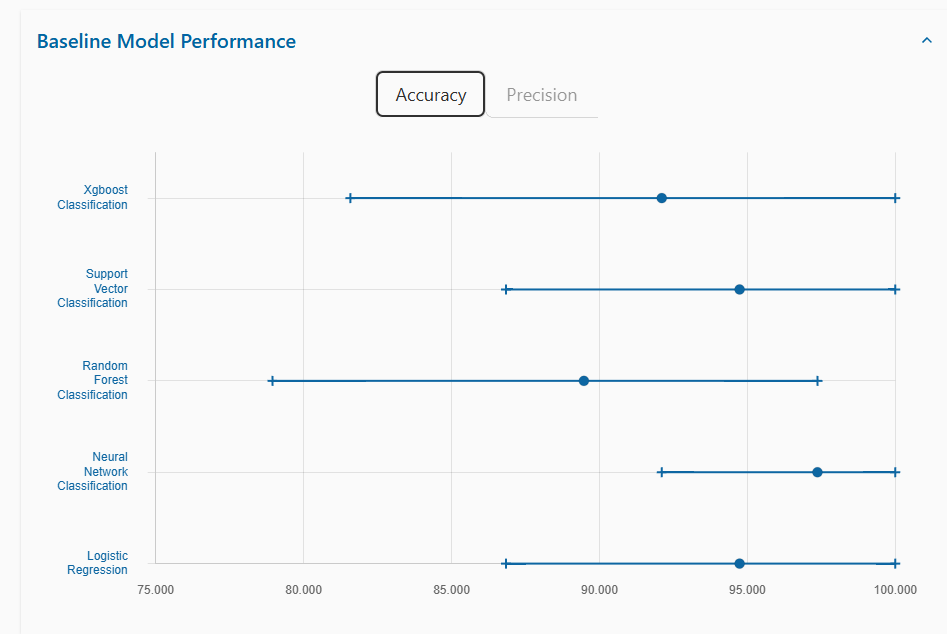

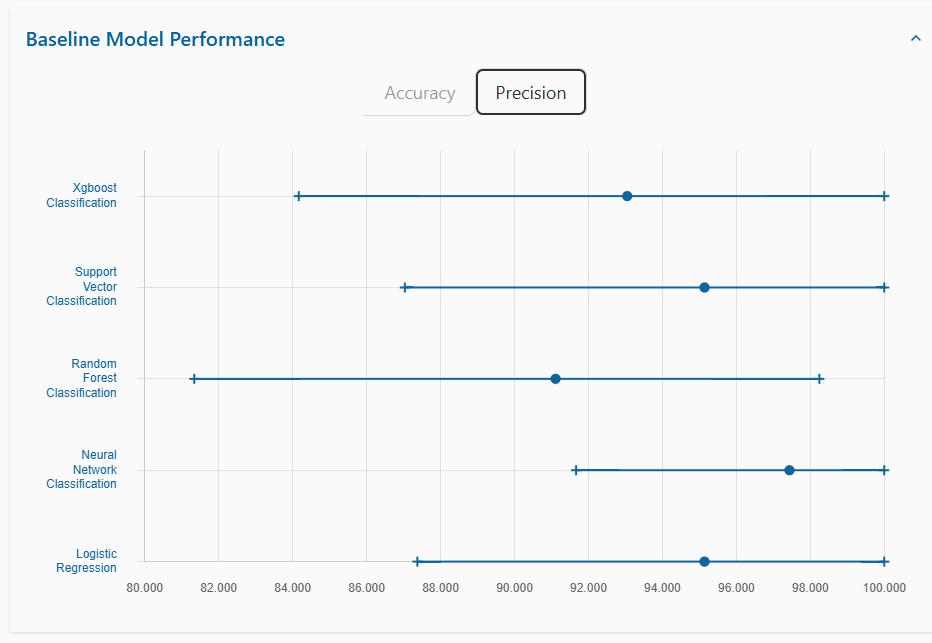

https://archive.ics.uci.edu/dataset/53/iris

### Import certain libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Let's load the `IRIS` data directly from `sklearn`

In [2]:
from sklearn.datasets import load_iris

In [3]:
#### Load the IRIS dataset
iris = load_iris()

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
### Show the feature names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_df = pd.DataFrame(data = iris['data'], columns= iris['feature_names'])

In [8]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
69,5.6,2.5,3.9,1.1
9,4.9,3.1,1.5,0.1
61,5.9,3.0,4.2,1.5
108,6.7,2.5,5.8,1.8
1,4.9,3.0,1.4,0.2


### Let us add the `target` variable

In [9]:
iris_df['target'] = iris['target']

In [12]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
103,6.3,2.9,5.6,1.8,2
20,5.4,3.4,1.7,0.2,0
146,6.3,2.5,5.0,1.9,2
30,4.8,3.1,1.6,0.2,0
27,5.2,3.5,1.5,0.2,0


### Quick EDA: Exploratory Data Analysis on `IRIS`

In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Let's assign `IRIS` species names to the target

In [14]:
iris_df['species'] = iris_df['target'].apply(lambda x: 'setosa' if x==0 else ('versicolor' if x==1 else 'virginica'))

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Let's check if there is any missing data

In [16]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

### let's plot the `box plot` to see the distribution of the data and also `outliers` if any

In [17]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

In [19]:
sel_cols  = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']

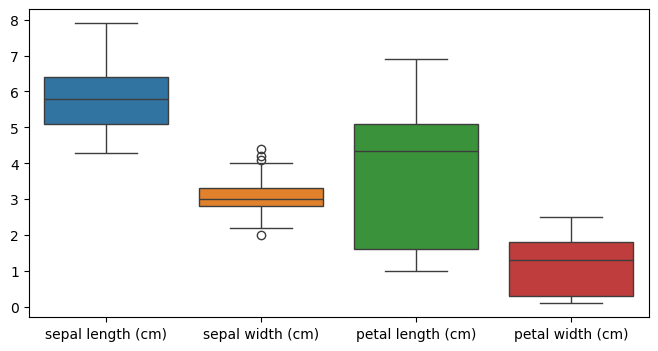

In [21]:
df = iris_df[sel_cols]

plt.figure(figsize=(8,4))
sns.boxplot(data=df)
plt.show()

### Function to plot the `violin plots`

In [22]:
def plot_vio(Y, i):
    plt.subplot(2,2,i)

    sns.violinplot(x='species', y= Y, data=iris_df, hue = 'species', dodge = False)

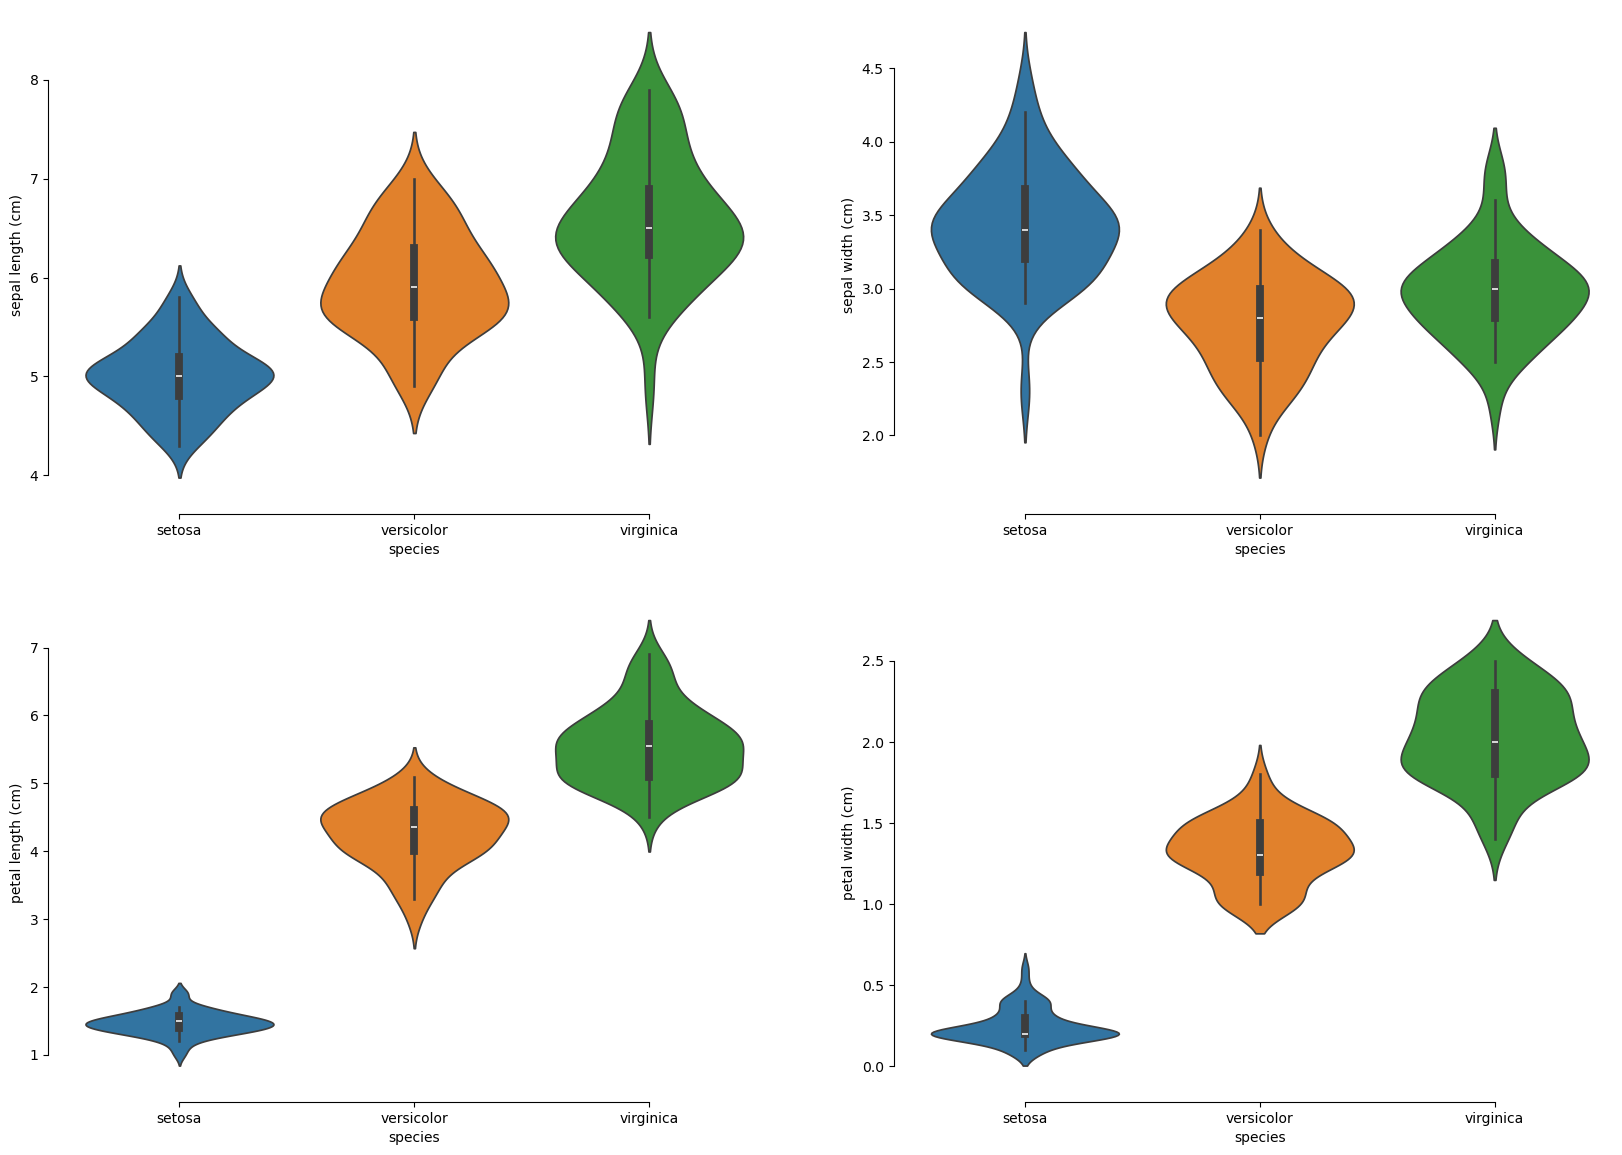

In [23]:
plt.figure(figsize = (20,14))

i=1
for m in iris_df.columns[:-2]:
    plot_vio(m, i)
    sns.despine(offset = 10, trim=True)
    i +=1

- Violin plot lets you see:
    - the center (median --white dot) of the data
    - spread and variability (shape of the violin + IQR)
    - how the distribution differ across species

### `MLP` Architecture

### `INPUT LAYER` ---> ` (1) HIDDEN LAYER` ---> `OUTPUT LAYER`

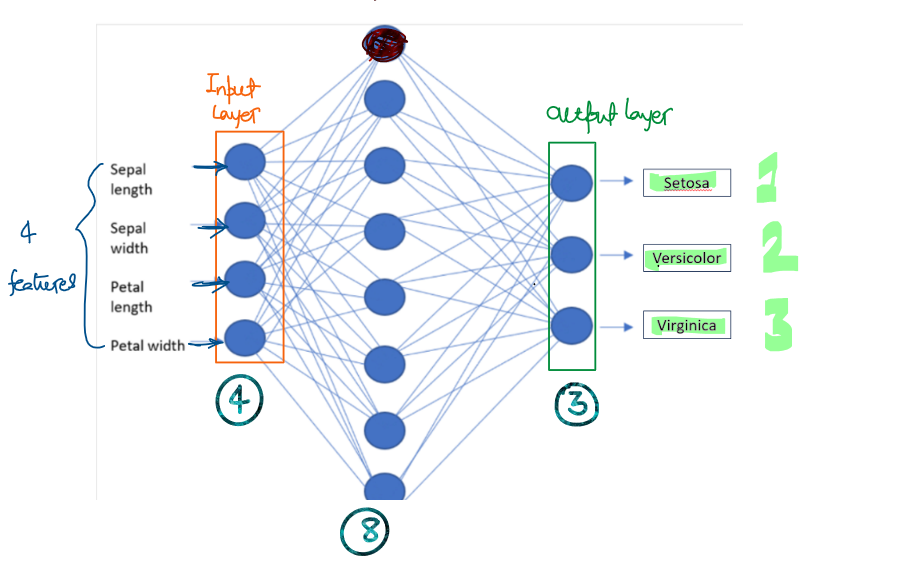

### Build MLP Model

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.01, epochs=100):
        self.input_size = input_size # no. of neurons as many features in the input layer
        self.hidden_size = hidden_size # no. of neurons in the hidden layer
        self.output_size = output_size # no. of neurons in the output layer
        self.learning_rate = learning_rate #to set the user defined learning rate for the gradient descent; default is set to 0.01
        self.epochs = epochs # no. of training epochs, default is set to 100

        ### INITIALIZE WEIGHTS & BIASES

        #################################
        # INPUT LAYER TO HIDDEN LAYER
        #################################
        self.W1 = np.random.randn(self.input_size, self.hidden_size)*0.01 #random weights initialized from std. normal distribution
        self.b1 = np.zeros(1, self.hidden_size))

        #################################
        # HIDDEN LAYER TO OUTPUT LAYER
        #################################
        self.W2 = np.random.randn(self.hidden_size, self.output_size)*0.01 #random weights initialized from std. normal distribution
        self.b2 = np.zeros(1, self.output_size))

         ######################################
        # COST & ACCURACY HISTORY FOR PLOTTING
        #######################################
        self.loss_history = [] #empty list initialized to store the losses during training epochs
        self.accuracy_history = [] #empty list initialized to store the accuracy values during training epochs


    ##### ADD SOME ACTIVATION FUNCTIONS 

    #1. ReLU Activation Function
    def relu(self, z):
        return np.maximum(0,z)

    #### Derivative of ReLU for backpropagation
    def relu_derivative(self, z):
        return np.where(z>0, 1, 0)

    ### Softmax Activation Function
    def softmax(self, z):
        exp_values = np.exp(z - np.max(z, axis=1, keepdims=True)) #subtract max for numerical stability -- numerical instability (read about it)
        return exp_values/np.sum(exp_values, axis=1, keepdims= True)


        
                            
    





##### Explaining activation function codes

In [29]:
def relu(z):
        return np.maximum(0,z)

In [30]:
z = np.array([-2, -1, 0, 1, 2])
z

array([-2, -1,  0,  1,  2])

In [31]:
relu(z)

array([0, 0, 0, 1, 2])

In [35]:
a = np.array([1,2,-3,0])
b = np.array([0,1,2,-1])
print(np.maximum(a,b))

[1 2 2 0]


In [39]:
def relu_derivative(z):
        return np.where(z>0, 1, 0)

In [40]:
relu_derivative(z)

array(['FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE'], dtype='<U5')

In [53]:
### Softmax Activation Function
def softmax(z):
    exp_values = np.exp(z - np.max(z, axis=1, keepdims=True)) #subtract max for numerical stability -- numerical instability (read about it)
    print("exp_values:",exp_values)
    return exp_values/np.sum(exp_values, axis=1, keepdims= True)

In [54]:
z = [[2.33, -1.46, 0.56]]   # shape (1,3)

In [55]:
softmax(z)

exp_values: [[1.         0.0225956  0.17033299]]


array([[0.83827314, 0.01894129, 0.14278557]])

In [49]:
np.max(z, axis=1, keepdims=True)

array([[2.33]])